## Package

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [7]:
data = pd.read_csv('/home/bibekg/Learning/AQI_COL/Air-Quality-Prediction/airprediction/Data/Real-Data/Real_Combine.csv')

# Reading first 5 rows
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

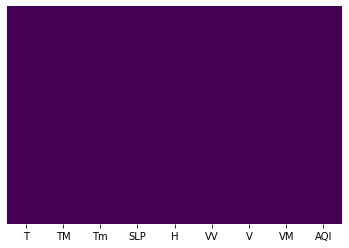

In [8]:
data.isnull().sum()

# if we have minimum null values we can drop null values
data = data.dropna()
# We don`t have null values

# Plotting the Null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Dividing the features

In [9]:
X = data.drop(['AQI'], axis=1) # Droping the Target Variable i.e. PM 2.5
Y = pd.DataFrame(data['AQI']) # Assigning the Target Vatiavle to Y

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [10]:
from sklearn.ensemble  import ExtraTreesRegressor

In [11]:
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [12]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': X.columns,
                                 'Feature_Imp' : model.feature_importances_
                                 })
fea_impotance

,Features,Feature_Imp
0,T,0.144656
1,TM,0.095259
2,Tm,0.187665
3,SLP,0.129517
4,H,0.083405
5,VV,0.265443
6,V,0.052819
7,VM,0.041236


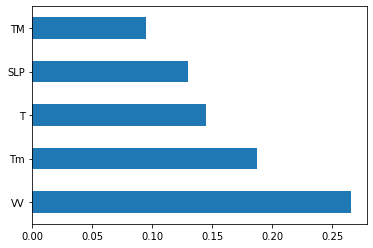

In [13]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Train Test Data Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=0)

### Plotting Target Variable

<AxesSubplot:ylabel='Density'>

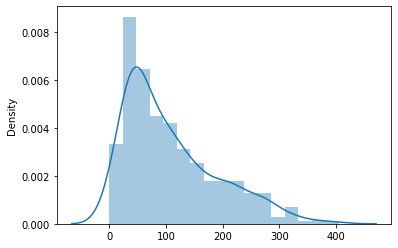

In [15]:
sns.distplot(Y)

## Implementing Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rand_forrest_reg = RandomForestRegressor()
rand_forrest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
# Calcu;ating R^2 for Training dataset
rf_train_score = rand_forrest_reg.score(X_train, Y_train)
print(f'Coefficient of determination R^2 on training Dataset : {rf_train_score}')

Coefficient of determination R^2 on training Dataset : 0.9474511367498404


In [19]:
# Calcu;ating R^2 for Testing dataset
rf_test_score = rand_forrest_reg.score(X_test, Y_test)
print(f'Coefficient of determination R^2 on training Dataset : {rf_test_score}')

Coefficient of determination R^2 on training Dataset : 0.6441658779991217


In [20]:
# Performing cross validation
from sklearn.model_selection import cross_val_score
rf_cross_val_score = cross_val_score(rand_forrest_reg, X,Y, cv=5)

In [21]:
rf_cross_val_score.mean()

0.49614525604374266

## Model Evaluation

In [22]:
prediction = rand_forrest_reg.predict(X_test)

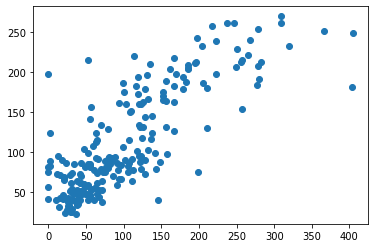

In [23]:
plt.scatter(Y_test, prediction)

### HyperParameter Tuning Random Forest

In [24]:
# For selecting the best Parameters
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Randomized Search CV

# No.of Decision-Trees in Random Forest
n_est = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# No,of Features to consider at every split
max_feat = ['auto','sqrt']

# Maximum no of levels in trees
maximum_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

# Minimum no.of samples required to sperate a node
minimum_sample_split = [2,5,10,15,100]

# Minimum no.of samples required at each leaf node
minimum_sample_leaf = [1,2,5,10]

In [26]:
RandomForestRegressor()

# All these parameters are the Parameters of RandomForestRegressor()
random_grid = {
    'n_estimators' : n_est,
    'max_depth' : maximum_depth,
    'min_samples_split' : minimum_sample_split,
    'min_samples_leaf' : minimum_sample_leaf,
    'max_features' : max_feat
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [27]:
# Using random_grid  to search for best parameter

# Creating the best Parameter to tune
rand_forrest = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator= rand_forrest ,
                                  param_distributions= random_grid, 
                                  scoring='neg_mean_squared_error', 
                                  n_iter=100, cv=5, verbose=2 ,random_state= 42)

In [28]:
%%time
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [30]:
rf_random.best_score_

-2591.5882595207095

In [31]:
prediction = rf_random.predict(X_test)

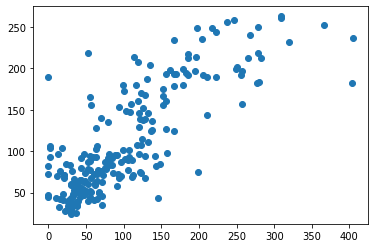

In [32]:
plt.scatter(Y_test,prediction)

In [33]:
# Calculting some of the Errors
from sklearn import metrics

In [34]:
print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')
print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')

MAE: 34.08750655736304
MSE: 2347.775327478978
RMSE: 48.45384739604253


### Creating PKL FileFormat for deployment purpose

In [35]:
import pickle

In [36]:
# Open a file 
file = open('regression_random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random,file)